In [1]:
# Pandas library is used for handling tabular data
import pandas as pd

# NumPy is used for handling numerical series operations (addition, multiplication, and ...)

import numpy as np
# Sklearn library contains all the machine learning packages we need to digest and extract patterns from the data
from sklearn import linear_model, model_selection, metrics
from sklearn.model_selection import train_test_split

# Machine learning libraries used to build a decision tree
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

# Sklearn's preprocessing library is used for processing and cleaning the data 
from sklearn import preprocessing

# for visualizing the tree
import pydotplus
from IPython.display import Image

In [2]:
launch_data = pd.read_excel('RocketLaunchDataCompleted.xlsx')
launch_data.head()

,Name,Date,Time (East Coast),Location,Crewed or Uncrewed,Launched?,High Temp,Low Temp,Ave Temp,Temp at Launch Time,...,Max Wind Speed,Visibility,Wind Speed at Launch Time,Hist Ave Max Wind Speed,Hist Ave Visibility,Sea Level Pressure,Hist Ave Sea Level Pressure,Day Length,Condition,Notes
0,NaN,1958-12-04,NaN,Cape Canaveral,NaN,NaN,75.0,68.0,71.00,NaN,...,16.0,15.0,NaN,NaN,NaN,30.22,NaN,10:26:00,Cloudy,NaN
1,NaN,1958-12-05,NaN,Cape Canaveral,NaN,NaN,78.0,70.0,73.39,NaN,...,14.0,10.0,NaN,NaN,NaN,30.2,NaN,10:26:00,Cloudy,NaN
2,Pioneer 3,1958-12-06,01:45:00,Cape Canaveral,Uncrewed,Y,73.0,0.0,60.21,62.0,...,15.0,10.0,11.0,NaN,NaN,30.25,NaN,10:25:00,Cloudy,NaN
3,NaN,1958-12-07,NaN,Cape Canaveral,NaN,NaN,76.0,57.0,66.04,NaN,...,10.0,10.0,NaN,NaN,NaN,30.28,NaN,10:25:00,Partly Cloudy,NaN
4,NaN,1958-12-08,NaN,Cape Canaveral,NaN,NaN,79.0,60.0,70.52,NaN,...,12.0,10.0,NaN,NaN,NaN,30.23,NaN,12:24:00,Partly Cloudy,NaN


In [3]:
launch_data.columns

Index(['Name', 'Date', 'Time (East Coast)', 'Location', 'Crewed or Uncrewed',
       'Launched?', 'High Temp', 'Low Temp', 'Ave Temp', 'Temp at Launch Time',
       'Hist High Temp', 'Hist Low Temp', 'Hist Ave Temp',
       'Percipitation at Launch Time', 'Hist Ave Percipitation',
       'Wind Direction', 'Max Wind Speed', 'Visibility',
       'Wind Speed at Launch Time', 'Hist Ave Max Wind Speed',
       'Hist Ave Visibility', 'Sea Level Pressure',
       'Hist Ave Sea Level Pressure', 'Day Length', 'Condition', 'Notes'],
      dtype='object')

In [4]:
launch_data.describe()

,High Temp,Low Temp,Ave Temp,Temp at Launch Time,Hist High Temp,Hist Low Temp,Hist Ave Temp,Percipitation at Launch Time,Hist Ave Percipitation,Max Wind Speed,Visibility,Wind Speed at Launch Time,Hist Ave Max Wind Speed,Hist Ave Visibility,Hist Ave Sea Level Pressure
count,299.000000,299.000000,299.000000,59.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,59.000000,0.0,0.0,0.0
mean,81.394649,38.745819,69.747124,75.101695,81.852843,62.872910,72.389900,0.063043,0.413478,16.842809,12.929766,10.593220,NaN,NaN,NaN
std,9.026700,33.423090,10.867407,10.471134,6.860432,8.806109,7.825282,0.211995,4.676693,4.701710,6.044445,4.672438,NaN,NaN,NaN
min,51.000000,0.000000,29.040000,50.000000,71.000000,49.000000,60.000000,0.000000,0.060000,8.000000,7.000000,2.000000,NaN,NaN,NaN
25%,77.000000,0.000000,63.050000,70.000000,75.000000,55.000000,65.000000,0.000000,0.080000,14.000000,10.000000,7.000000,NaN,NaN,NaN
50%,82.000000,51.000000,71.610000,77.000000,82.000000,64.000000,72.000000,0.000000,0.110000,16.000000,10.000000,10.000000,NaN,NaN,NaN
75%,88.000000,72.000000,78.530000,81.500000,88.000000,73.000000,80.000000,0.000000,0.200000,18.000000,15.000000,12.500000,NaN,NaN,NaN
max,99.000000,83.000000,90.790000,98.000000,91.000000,79.000000,82.000000,1.800000,81.000000,60.000000,80.000000,26.000000,NaN,NaN,NaN


# Data Cleaning

Here are a few ways we'll clean the data:

- The rows that don't have Y in the Launched column didn't have a rocket launch, so make those missing values N.
- For rows missing information on whether the rocket was crewed or uncrewed, assume uncrewed. Uncrewed is more likely because there were fewer crewed missions.
- For missing wind direction, mark it as unknown.
- For missing condition data, assume it was a typical day and use fair.
- For any other data, use a value of 0.

In [5]:
launch_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300 entries, 0 to 299
Data columns (total 26 columns):
 #   Column                        Non-Null Count  Dtype         
---  ------                        --------------  -----         
 0   Name                          60 non-null     object        
 1   Date                          300 non-null    datetime64[ns]
 2   Time (East Coast)             59 non-null     object        
 3   Location                      300 non-null    object        
 4   Crewed or Uncrewed            60 non-null     object        
 5   Launched?                     60 non-null     object        
 6   High Temp                     299 non-null    float64       
 7   Low Temp                      299 non-null    float64       
 8   Ave Temp                      299 non-null    float64       
 9   Temp at Launch Time           59 non-null     float64       
 10  Hist High Temp                299 non-null    float64       
 11  Hist Low Temp                 29

In [6]:
## To handle missing values, we will fill the missing values with appropriate values 
launch_data['Launched?'].fillna('N',inplace=True)
launch_data['Crewed or Uncrewed'].fillna('Uncrewed',inplace=True)
launch_data['Wind Direction'].fillna('unknown',inplace=True)
launch_data['Condition'].fillna('Fair',inplace=True)
launch_data.fillna(0,inplace=True)
launch_data.head()

,Name,Date,Time (East Coast),Location,Crewed or Uncrewed,Launched?,High Temp,Low Temp,Ave Temp,Temp at Launch Time,...,Max Wind Speed,Visibility,Wind Speed at Launch Time,Hist Ave Max Wind Speed,Hist Ave Visibility,Sea Level Pressure,Hist Ave Sea Level Pressure,Day Length,Condition,Notes
0,0,1958-12-04,0,Cape Canaveral,Uncrewed,N,75.0,68.0,71.00,0.0,...,16.0,15.0,0.0,0.0,0.0,30.22,0.0,10:26:00,Cloudy,0
1,0,1958-12-05,0,Cape Canaveral,Uncrewed,N,78.0,70.0,73.39,0.0,...,14.0,10.0,0.0,0.0,0.0,30.2,0.0,10:26:00,Cloudy,0
2,Pioneer 3,1958-12-06,01:45:00,Cape Canaveral,Uncrewed,Y,73.0,0.0,60.21,62.0,...,15.0,10.0,11.0,0.0,0.0,30.25,0.0,10:25:00,Cloudy,0
3,0,1958-12-07,0,Cape Canaveral,Uncrewed,N,76.0,57.0,66.04,0.0,...,10.0,10.0,0.0,0.0,0.0,30.28,0.0,10:25:00,Partly Cloudy,0
4,0,1958-12-08,0,Cape Canaveral,Uncrewed,N,79.0,60.0,70.52,0.0,...,12.0,10.0,0.0,0.0,0.0,30.23,0.0,12:24:00,Partly Cloudy,0


In [7]:
launch_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300 entries, 0 to 299
Data columns (total 26 columns):
 #   Column                        Non-Null Count  Dtype         
---  ------                        --------------  -----         
 0   Name                          300 non-null    object        
 1   Date                          300 non-null    datetime64[ns]
 2   Time (East Coast)             300 non-null    object        
 3   Location                      300 non-null    object        
 4   Crewed or Uncrewed            300 non-null    object        
 5   Launched?                     300 non-null    object        
 6   High Temp                     300 non-null    float64       
 7   Low Temp                      300 non-null    float64       
 8   Ave Temp                      300 non-null    float64       
 9   Temp at Launch Time           300 non-null    float64       
 10  Hist High Temp                300 non-null    float64       
 11  Hist Low Temp                 30

# Data manipulation

Because computations are best suited for numerical inputs, convert all text into numbers. As an example, we'll use 1 if a rocket is crewed and 0 if a rocket is uncrewed.

In [8]:
## As part of the data cleaning process, we have to convert text data to numerical because computers understand only numbers
label_encoder = preprocessing.LabelEncoder()

# Three columns have categorical text info, and we convert them to numbers
launch_data['Crewed or Uncrewed'] = label_encoder.fit_transform(launch_data['Crewed or Uncrewed'])
launch_data['Wind Direction'] = label_encoder.fit_transform(launch_data['Wind Direction'])
launch_data['Condition'] = label_encoder.fit_transform(launch_data['Condition'])

In [9]:
launch_data.head()

,Name,Date,Time (East Coast),Location,Crewed or Uncrewed,Launched?,High Temp,Low Temp,Ave Temp,Temp at Launch Time,...,Max Wind Speed,Visibility,Wind Speed at Launch Time,Hist Ave Max Wind Speed,Hist Ave Visibility,Sea Level Pressure,Hist Ave Sea Level Pressure,Day Length,Condition,Notes
0,0,1958-12-04,0,Cape Canaveral,1,N,75.0,68.0,71.00,0.0,...,16.0,15.0,0.0,0.0,0.0,30.22,0.0,10:26:00,0,0
1,0,1958-12-05,0,Cape Canaveral,1,N,78.0,70.0,73.39,0.0,...,14.0,10.0,0.0,0.0,0.0,30.2,0.0,10:26:00,0,0
2,Pioneer 3,1958-12-06,01:45:00,Cape Canaveral,1,Y,73.0,0.0,60.21,62.0,...,15.0,10.0,11.0,0.0,0.0,30.25,0.0,10:25:00,0,0
3,0,1958-12-07,0,Cape Canaveral,1,N,76.0,57.0,66.04,0.0,...,10.0,10.0,0.0,0.0,0.0,30.28,0.0,10:25:00,6,0
4,0,1958-12-08,0,Cape Canaveral,1,N,79.0,60.0,70.52,0.0,...,12.0,10.0,0.0,0.0,0.0,30.23,0.0,12:24:00,6,0


# Further data cleansing

Next, we'll remove some of the columns that aren't needed for making this prediction. Columns like "Name" give us more context about the data. But the name of a launch doesn't indicate if weather will cause the launch to be postponed. In this module, we'll focus on the columns for wind speed, conditions, and precipitation.

In [10]:
# First, we save the output we are interested in. In this case, "launch" yes and no's go into the output variable.
y = launch_data['Launched?']

# Removing the columns we are not interested in
launch_data.drop(
    ['Name','Date','Time (East Coast)','Location','Launched?','Hist Ave Sea Level Pressure',
    'Sea Level Pressure','Day Length','Notes','Hist Ave Visibility', 'Hist Ave Max Wind Speed'],
    axis=1, 
    inplace=True
    )

# Saving the rest of the data as input data
X = launch_data

In [11]:
# List of variables that our machine learning algorithm is going to look at:
X.columns

Index(['Crewed or Uncrewed', 'High Temp', 'Low Temp', 'Ave Temp',
       'Temp at Launch Time', 'Hist High Temp', 'Hist Low Temp',
       'Hist Ave Temp', 'Percipitation at Launch Time',
       'Hist Ave Percipitation', 'Wind Direction', 'Max Wind Speed',
       'Visibility', 'Wind Speed at Launch Time', 'Condition'],
      dtype='object')

# Create a machine learning model

The random_state parameter is used for most machine learning algorithms. It controls the randomness of the algorithm. When you use this estimator to split the data into data to train with and data to test with, the seed that's provided here dictates the randomness of that split. The next unit provides more information on data splitting.

The max_depth parameter is a tree-specific parameter that lets you scope the output of the model. In this case, it's not that informative to know every possible probability of a specific weather condition and how it might affect the likelihood of a rocket launch. The depth is capped at five to limit the knowledge gained to what is most practically related to the outcome.

In [12]:
# Create decision tree classifier 
tree_model = DecisionTreeClassifier(random_state=0, max_depth=5)

# Split data into training and testing

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=99)

# Fit the model

In [14]:
# Fitting the model to the training data
tree_model.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=5, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')

# Test the model

In [15]:
# Do prediction on test Data
y_pred = tree_model.predict(X_test)
print(y_pred)

['N' 'N' 'N' 'Y' 'N' 'N' 'N' 'N' 'Y' 'Y' 'N' 'Y' 'N' 'N' 'N' 'N' 'N' 'N'
 'N' 'N' 'N' 'N' 'Y' 'Y' 'N' 'N' 'N' 'N' 'N' 'N' 'N' 'Y' 'N' 'N' 'N' 'N'
 'N' 'N' 'N' 'N' 'N' 'N' 'Y' 'N' 'N' 'N' 'Y' 'N' 'N' 'N' 'N' 'N' 'N' 'N'
 'N' 'N' 'N' 'N' 'N' 'Y']


# Score the model

In [16]:
# Calculate accuracy
round(tree_model.score(X_test, y_test) * 100, 2)

98.33

# Visualize the machine learning model

To create a visual representation of the model, you'll create a function that takes in as parameters:

- Data: tree - The machine learning model
- Columns: feature_names - A list of the columns in the input data
- Output: class_names - A list of the options for classification (in this case, yes or no)
- File name: png_file_to_save - The name of the file where you want to save the visualization

In [17]:
# Let's import a library for visualizing our decision tree.
from sklearn.tree import export_graphviz

def tree_graph_to_png(tree, feature_names, class_names, png_file_to_save):
    tree_str = export_graphviz(tree, feature_names=feature_names, class_names=class_names,
                                     filled=True, out_file=None)
    graph = pydotplus.graph_from_dot_data(tree_str)  
    return Image(graph.create_png())

Calling this function is fairly straightforward:

- Data: tree_model - The model you trained and tested earlier
- Columns: X.columns.values - The list of columns in the input
- Output: [yes, no] - The two possible outcomes
- File name: decision_tree.png - The name of the file where you want to save the image

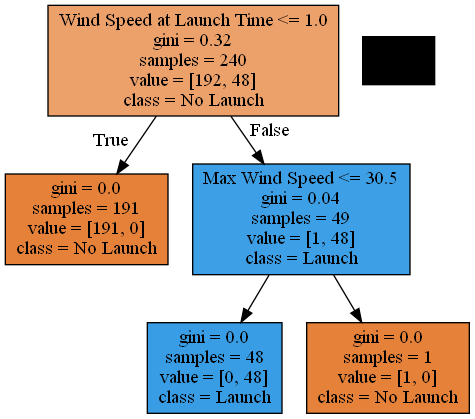

In [18]:
# This function takes a machine learning model and visualizes it.
tree_graph_to_png(
    tree=tree_model, 
    feature_names=X.columns.values,
    class_names=['No Launch','Launch'], 
    png_file_to_save='decision-tree.png'
    )

# Predict the success of a rocket launch using machine learning

Finally, it's time to test your model with data that was never found in your dataset.

On July 30, 2020, NASA launched the Perseverance rover to Mars from Cape Canaveral at 7:50 AM Eastern Time.

Gather the input data for the model:

- Crewed or Uncrewed
- High Temp
- Low Temp
- Ave Temp
- Temp at Launch Time
- Hist High Temp
- Hist Low Temp
- Hist Ave Temp
- Precipitation at Launch Time
- Hist Ave Precipitation
- Wind Direction
- Max Wind Speed
- Visibility
- Wind Speed at Launch Time
- Hist Ave Max Wind Speed
- Hist Ave Visibility
- Condition

You can find this information on most weather sites. Remember the data should be all numerical.

The following example uses hypothetical data:

In [19]:
# ['Crewed or Uncrewed', 'High Temp', 'Low Temp', 'Ave Temp',
#        'Temp at Launch Time', 'Hist High Temp', 'Hist Low Temp',
#        'Hist Ave Temp', 'Precipitation at Launch Time',
#        'Hist Ave Precipitation', 'Wind Direction', 'Max Wind Speed',
#        'Visibility', 'Wind Speed at Launch Time', 'Hist Ave Max Wind Speed',
#        'Hist Ave Visibility', 'Condition']

data_input = [ 1.  , 75.  , 68.  , 71.  ,  0.  , 75.  , 55.  , 65.  ,  0.  , 0.08,  0.  , 16.  , 15.  ,  0.  ,  0. ]

tree_model.predict([data_input])

array(['N'], dtype=object)

# Continue to improve

As you continue to improve your model in ways described throughout this learning path, keep an eye out on other NASA rocket launches. See if your model can accurately predict the outcomes.

You can also use weather predictions combined with your machine learning model to see if you can predict if there's a delay even before the launches happen!